In [48]:
! pip install pandas

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [50]:
reliance_df = pd.read_csv("RELIANCE.csv")
reliance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [51]:
reliance_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [52]:
tcs_df = pd.read_csv("TCS.csv", parse_dates=True)
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [53]:
tcs_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [54]:
def clean_and_align_dates(file1_path: str, file1_name: str, file2_path: str, file2_name: str, output_file: str) -> (str, str):
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])

    start_date = max(df1['Date'].min(), df2['Date'].min())
    end_date = min(df1['Date'].max(), df2['Date'].max())

    df1_cleaned = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)]
    df2_cleaned = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]

    df1_cleaned.to_csv(output_file.replace('.csv', file1_name + '.csv'), index=False)
    df2_cleaned.to_csv(output_file.replace('.csv', file2_name + '.csv'), index=False)

    file_name1 = 'cleaned' + file1_name + '.csv'
    file_name2 = 'cleaned' + file2_name + '.csv'

    return file_name1, file_name2

In [55]:
file1_path = 'RELIANCE.csv'
file1_name = '_RELIANCE'
file2_path = 'TCS.csv'
file2_name = '_TCS'
output_file = 'cleaned.csv'
file1, file2 = clean_and_align_dates(file1_path, file1_name, file2_path, file2_name, output_file)

In [56]:
reliance_df = pd.read_csv(file1)
tcs_df = pd.read_csv(file2)

In [57]:
reliance_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,RELIANCE,EQ,453.55,454.00,458.90,450.45,458.00,458.00,455.09,6272902,2.854728e+14,NaN,1734725.0,0.2765
1,2004-08-26,RELIANCE,EQ,458.00,461.00,466.35,459.30,461.05,460.70,462.83,6532004,3.023202e+14,NaN,2284324.0,0.3497
2,2004-08-27,RELIANCE,EQ,460.70,461.25,463.40,453.65,459.10,458.20,458.38,4769921,2.186456e+14,NaN,1310787.0,0.2748
3,2004-08-30,RELIANCE,EQ,458.20,461.10,468.40,461.10,467.00,467.20,466.58,3505532,1.635622e+14,NaN,975446.0,0.2783
4,2004-08-31,RELIANCE,EQ,467.20,468.05,476.85,468.05,475.00,475.65,473.04,5302862,2.508474e+14,NaN,1480857.0,0.2793


In [58]:
tcs_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [59]:
reliance_df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2.456000e+03,4.134000e+03,4134.000000
mean,1197.014388,1198.860317,1215.412769,1180.488910,1197.201824,1197.386688,1198.041638,5.707891e+06,7.255461e+14,1.452306e+05,2.462305e+06,0.464699
std,508.304006,510.181484,519.768726,497.590113,508.209509,508.323657,508.512149,5.271934e+06,9.102230e+14,1.297557e+05,1.946604e+06,0.129166
min,453.550000,454.000000,458.900000,450.450000,458.000000,458.000000,455.090000,5.282000e+04,9.037442e+12,2.991000e+03,2.909700e+04,0.086900
25%,866.300000,867.425000,876.725000,855.600000,865.900000,866.800000,866.280000,2.905056e+06,2.835953e+14,7.215900e+04,1.329732e+06,0.371700
50%,1016.900000,1019.200000,1030.000000,1007.000000,1017.700000,1016.950000,1017.940000,4.198139e+06,4.486437e+14,1.021435e+05,1.976284e+06,0.475450
75%,1361.875000,1363.350000,1379.975000,1344.075000,1362.050000,1363.000000,1361.775000,6.600098e+06,7.957313e+14,1.686702e+05,2.933239e+06,0.559175
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [60]:
tcs_df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


In [61]:
reliance_df['Year'] = reliance_df['Date'].apply(lambda x: x.split('-')[0])
tcs_df['Year'] = tcs_df['Date'].apply(lambda x: x.split('-')[0])

In [62]:
reliance_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year
0,2004-08-25,RELIANCE,EQ,453.55,454.00,458.90,450.45,458.00,458.00,455.09,6272902,2.854728e+14,NaN,1734725.0,0.2765,2004
1,2004-08-26,RELIANCE,EQ,458.00,461.00,466.35,459.30,461.05,460.70,462.83,6532004,3.023202e+14,NaN,2284324.0,0.3497,2004
2,2004-08-27,RELIANCE,EQ,460.70,461.25,463.40,453.65,459.10,458.20,458.38,4769921,2.186456e+14,NaN,1310787.0,0.2748,2004
3,2004-08-30,RELIANCE,EQ,458.20,461.10,468.40,461.10,467.00,467.20,466.58,3505532,1.635622e+14,NaN,975446.0,0.2783,2004
4,2004-08-31,RELIANCE,EQ,467.20,468.05,476.85,468.05,475.00,475.65,473.04,5302862,2.508474e+14,NaN,1480857.0,0.2793,2004


In [63]:
tcs_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042,2004
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561,2004
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549,2004
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294,2004
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624,2004


In [76]:
reliance_df.Year.unique()

array(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'], dtype=object)

In [79]:
tcs_df.Year.unique()

array(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'], dtype=object)

In [77]:
avg_close_reliance = reliance_df.groupby('Year')['Close'].mean()
avg_close_reliance

Year
2004     516.868889
2005     656.648008
2006    1009.713600
2007    1907.181325
2008    2107.926016
2009    1749.400823
2010    1037.187302
2011     888.687652
2012     772.108964
2013     848.711400
2014     954.456557
2015     915.560484
2016    1013.919838
2017    1195.390323
2018    1041.190041
2019    1321.754490
2020    1743.402183
2021    2008.503750
Name: Close, dtype: float64

In [78]:
avg_close_tcs = tcs_df.groupby('Year')['Close'].mean()
avg_close_tcs

Year
2004    1137.170000
2005    1371.885857
2006    1475.801400
2007    1150.614056
2008     789.026016
2009     567.345473
2010     862.890079
2011    1116.748583
2012    1238.335259
2013    1692.059200
2014    2369.738320
2015    2537.717944
2016    2419.233401
2017    2475.778427
2018    2428.095528
2019    2100.662857
2020    2262.787302
2021    3130.806250
Name: Close, dtype: float64

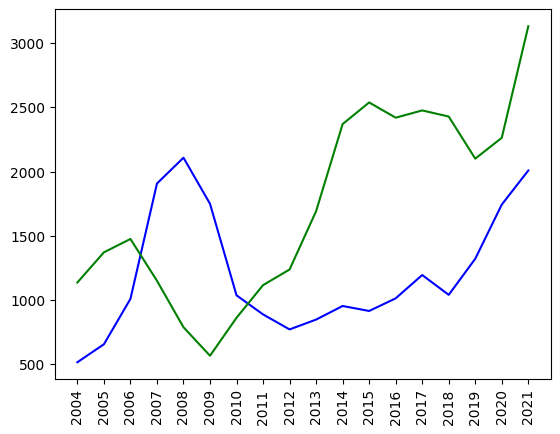

In [83]:
plt.plot(reliance_df.Year.unique(), avg_close_reliance, color='b', label='reliance')
plt.plot(tcs_df.Year.unique(), avg_close_tcs, color='g', label='tcs')
plt.xticks(rotation = 90)
plt.show()